## Proyecto Computacional

###  Curso: Procesamiento, Análisis, Codificación y Seguridad de Imágenes Digitales

###   Profesor: Manuel Quispe

Primero, se va a importar las librerías necesarias para realizar el procesamiento de imágenes con Python, para este caso se utilizará numpy, matplotlib y openCV para la adquisición de imágenes. Además, se deja comentado la instrucción para la instalación de la librería openCV en caso no se cuente con ese paquete instalado. 

In [1]:
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt

#!pip install opencv-python
import cv2

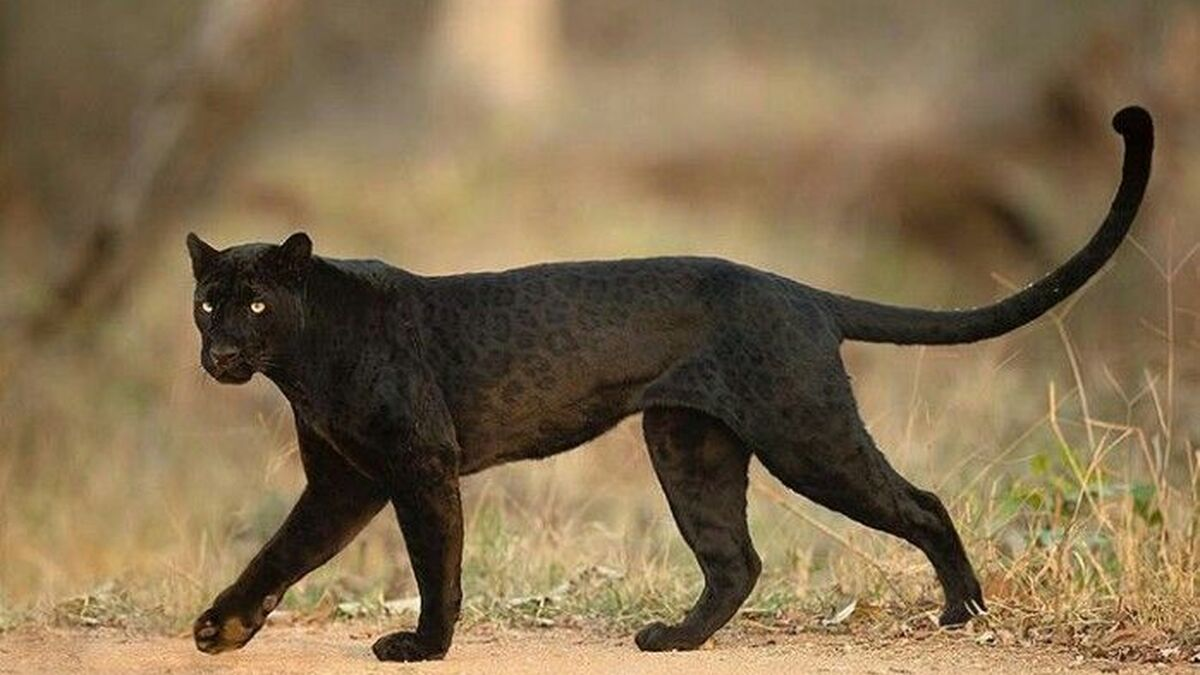

A continuación, se requiere de una imagen sobre la cual realizar el procesamiento, para el caso del proyecto asignado se utilizará la imagen siguiente: 

Se procede a leer la imagen con la ayuda de la librería openCV.

In [2]:
img = cv2.imread('pantera.jpg')

Debido a que openCV lee las imágenes en formato BGR, sin una debida conversión al espacio de color RGB la imagen podría adoptar un color indeseado.

In [3]:
imgRGB  = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
imgGray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

Ahora, se procede con la impresión en pantalla de la imagen adquirida.

### Imagen de una Pantera en RGB

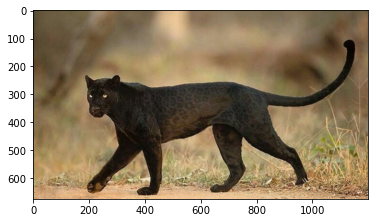

In [4]:
plt.imshow(imgRGB)

## Imagen de un Pantera en escala de Grises

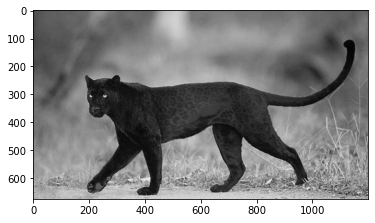

In [5]:
plt.imshow(imgGray,cmap="gray")

En este punto, ya se cuenta con las librerías e imagenes necesarias para iniciar con el procesamiento de imágenes.

### Implementar una función de convolución (usar como parámetro de entrada imagen, filtro, tipo de filtro y estrategia para realizar la operación y salida imagen resultante).

Para realizar este punto se procede a definir una función que permita hacer la convolución sobre toda la imagen.

In [6]:
def convolucion(imagen, filtro, borde):
    if  filtro == 'promedio':
        kernel = np.array([[1,1,1],[1,1,1],[1,1,1]])
        n = 9
        state = 0
    elif filtro == 'gauss':
        kernel = np.array([[1,2,1],[2,4,2],[1,2,1]])
        n = 16
        state = 0
    elif filtro == 'alta':
        kernel = np.array([[0,-1,0],[-1,4,-1],[0,-1,0]])
        n = 1
        state = 0
    elif filtro == 'sobelX':
        kernel = np.array([[-1,0,1],[-2,0,2],[-1,0,1]])
        n = 1
        state = 0
    elif filtro == 'sobelY':
        kernel = np.array([[-1,-2,-1],[0,0,0],[1,2,1]])
        n = 1
        state = 0
    elif filtro == 'mediana':
        state = 1
    elif filtro == 'sobelXY':
        state = 2

    else:
        print('Valor no reconocido')
        return -1
    
    # Hallamos la longitud y altura de la matriz imagen
    length = img.shape[0]
    height = img.shape[1]
    
    if borde == 0:
        imgBorde = np.zeros((length+2, height+2))
    elif borde == 1:
        imgBorde = np.ones((length+2, height+2))
    
    # Aquí ya se cuenta con la imagen con el tipo de borde deseado (ceros o unos)
    imgBorde[1:1+length, 1:1+height] = imagen
    
    
    # Se inicializa la matriz resultante de la convolución con ceros
    result = np.zeros((length, height))
    
    if state == 0:
        for i in range(length):
            for j in range(height):
                # En 'aux' se calcula la convolución, se toma un trozo de 3x3 de la imagen con el borde seleccionado
                # y se multiplica elemento a elemento con el kernel (3x3), luego se suman los elementos resultantes y
                # se dividen entre el número n (también definido junto con cada kernel).
                aux = np.multiply(imgBorde[i:i+3,j:j+3], kernel)  
                aux = np.sum(aux)//n
                result[i][j] = aux
    
    elif state == 1:
        for i in range(length):
            for j in range(height):
                aux = imgBorde[i:i+3,j:j+3]
                aux = np.median(aux)
                result[i][j] = aux
                
    elif state == 2:
        result = convolucion(imagen, 'sobelX', borde) + convolucion(imagen, 'sobelY', borde)
    
       
    return result

A modo de ejemplo aplicaremos la funcion creada **'convolucion'** y aplicaremos el filtro pasa bajos o promedio a la imagen en escala de grises, colocaremos un borde externo de CEROS (a la imagen original) y lo plotearemos:

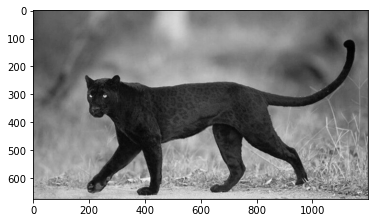

In [7]:
imgPromedio = convolucion(imgGray,'promedio',0)
plt.imshow(imgPromedio,cmap="gray")

Si bien la diferencia no es notoria, respecto a la imagen en escala de grises original, esto se debe al tamaño del kernel usado (3x3) y a la cantidad de repeticiones del filtro sobre la imagen. Por ello, los cambios en la imagen se harían más notorios si se utilizase un kernel 9x9 o aplicando varias veces la convolución sobre la imagen. Para la imagen siguiente se ha aplicado el filtro 15 veces sobre la imagen en escala de grises original:

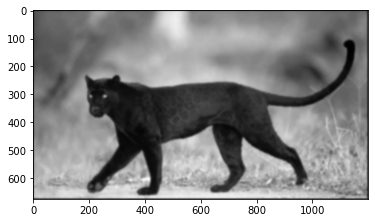

In [8]:
temp = imgGray
for i in range(15):
    temp = convolucion(temp, 'promedio',0)

imgPromedio15 = temp
plt.imshow(imgPromedio15,cmap="gray")

De esta última imagen ya se puede ver un efecto notorio de la difuminación ocasionada por el filtro.

## Implementar un filtro de media y mediana.

Debido a que estos kernels han sido declarados en el apartado anterior, basta con llamar a la funcion creada, de la forma siguiente:

Filtro promedio (15 veces):

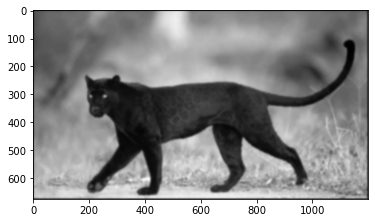

In [9]:
plt.imshow(imgPromedio15,cmap="gray")

In [10]:
temp = imgGray
for i in range(15):
    temp = convolucion(temp, 'mediana',0)

imgMediana15 = temp


Filtro mediana (15 veces)

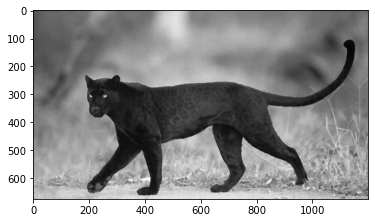

In [11]:
plt.imshow(imgMediana15,cmap="gray")

## Umbralización de la imagen:

En primer lugar procederemos con la umbralización de la imagen

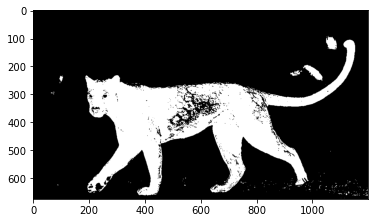

In [98]:
#imgUmbralizada = np.logical_and(imgGray < 45, imgGray > 10)
imgUmbralizada = imgGray < 60
plt.imshow(imgUmbralizada,cmap="gray")

Teniendo esta imagen se requiere aplicar operaciones morfológicas, para ello se realiza la función siguiente:

In [99]:
def opmorfologica(img, tipo):
    if tipo == 'dilatacion':
        status = 0
    elif tipo == 'erosion':
        status = 1
    elif tipo == 'cerradura':
        status = 2
    elif tipo == 'apertura':
        status = 3
    
    length = img.shape[0]
    height = img.shape[1]
    
    imgBorde = np.zeros((length+2, height+2))
    
    # Aquí ya se cuenta con la imagen con el tipo de borde deseado (ceros o unos)
    imgBorde[1:1+length, 1:1+height] = img
    
    
    # Se inicializa la matriz resultante de la convolución con ceros
    result = np.zeros((length, height))
    
    if status == 0:
        for i in range(length):
            for j in range(height):
                aux = np.any(imgBorde[i:i+3,j:j+3])  
                result[i][j] = aux
                
    elif status == 1:
        for i in range(length):
            for j in range(height):
                aux = np.all(imgBorde[i:i+3,j:j+3])  
                result[i][j] = aux
                
    elif status == 2:
        aux = opmorfologica(img,'dilatacion')
        aux = opmorfologica(aux,'dilatacion')
        aux = opmorfologica(aux,'dilatacion')
        aux = opmorfologica(aux,'dilatacion')
        aux = opmorfologica(aux,'erosion')
        aux = opmorfologica(aux,'erosion')
        aux = opmorfologica(aux,'erosion')
        aux = opmorfologica(aux,'erosion')
        result = aux
    elif status == 3:
        aux = opmorfologica(img,'erosion')
        aux = opmorfologica(aux,'erosion')
        aux = opmorfologica(aux,'erosion')
        aux = opmorfologica(aux,'erosion')
        aux = opmorfologica(aux,'dilatacion')
        aux = opmorfologica(aux,'dilatacion')
        aux = opmorfologica(aux,'dilatacion')
        aux = opmorfologica(aux,'dilatacion')
        result = aux
    return result

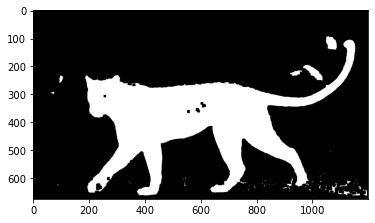

In [100]:
temp = imgUmbralizada
temp = opmorfologica(temp,'cerradura')

plt.imshow(temp,cmap="gray")

Ahora se superpone la imagen umbralizada y segmentada con la imagen en escala de grises, dando el resultado siguiente:

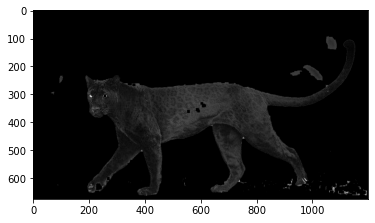

In [107]:
imgUmbMorf = temp
imgSegmentadaGray = np.multiply(imgGray, imgUmbMorf)
plt.imshow(imgSegmentadaGray,cmap="gray")

Sobre la imagen en escala de grises también se puede aplicar el algorimo de Sobel para detecciónd de bordes:

In [125]:
sobelXY = convolucion(imgGray, 'sobelXY',0)

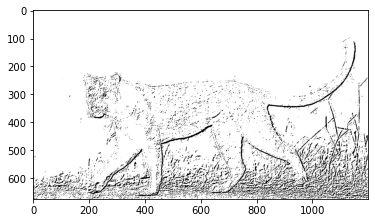

In [138]:
sobelXYneg = sobelXY<55
plt.imshow(sobelXYneg,cmap="gray")

## Se aplica la métrica de Error Absoluto entre la imagen en escala de grises original y del filtro mediana:

In [115]:
def errAbsoluto(img1, img2):
    if img1.shape == img2.shape:
        x = img1.shape[0]
        y = img1.shape[1]
        temp = np.subtract(img1, img2)
        temp = np.absolute(temp)
        temp = np.sum(temp)//(x*y)
        return temp
    else:
        print ('Las dimensiones de las matrices no coinciden')
    

Ahora que se cuenta con la funcion **errAbsoluto** se procede con a aplicarlo sobre las matrices trabajadas:

In [116]:
temp = errAbsoluto(imgGray, imgMediana15)
print(temp)

2.0
